# Importing Necessary Modules

In [ ]:
import pandas as pd
import datetime

# Importing the data

Reading the data

In [ ]:
df = pd.read_csv('raw_data.csv') #Reading the data
df = pd.DataFrame(df)  #Converting the into a pandas dataframe
df

,id,gender,dob,income,marital_status,city,last_purchase_date,score
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,27-05-1992,83451,Divorced,Colorado Springs,18-12-2020,653
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,NaN,New Orleans,2021-05-25,535
...,...,...,...,...,...,...,...,...
2564675,278d8e62-e08f-4ddc-9a2c-c1acafbff89c,Male,1975-04-26,20621,Widowed,Portland,2011-02-18,959
2564676,8d8591b5-f4d4-4a8d-b189-e6bde52ca3f4,Male,23-01-1983,13712,Married,Baltimore,2017-09-28,692
2564677,d026ad35-f992-43ca-918a-a760e43615be,Male,28-01-1976,62958,Widowed,Nashville,06-12-2015,471
2564678,a03048e4-ec77-4eca-8de2-2a6450e3c451,Female,1979-10-01,1082,Divorced,Milwaukee,2015-03-28,65


# Checking the data for missing values and duplicated records

In [ ]:
df.info() #CHecking data types of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564680 entries, 0 to 2564679
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  object
 1   gender              object
 2   dob                 object
 3   income              int64 
 4   marital_status      object
 5   city                object
 6   last_purchase_date  object
 7   score               int64 
dtypes: int64(2), object(6)
memory usage: 156.5+ MB


Checking for missing/null values

In [ ]:
#check for nulls
df.isna().sum()

id                         0
gender                234849
dob                        0
income                     0
marital_status        285195
city                   51187
last_purchase_date         0
score                      0
dtype: int64

Checking for duplicate entries

In [ ]:
#check for duplicates
print(f'duplicate entries: {df.duplicated().sum()}')

duplicate entries: 2464680


# Removing any duplicate records from the data

In [ ]:
df.shape #Dataframe size with duplicate entries

(2564680, 8)

In [ ]:
new_df = df.drop_duplicates() #removing duplicate rows
new_df

,id,gender,dob,income,marital_status,city,last_purchase_date,score
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,27-05-1992,83451,Divorced,Colorado Springs,18-12-2020,653
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,NaN,New Orleans,2021-05-25,535
...,...,...,...,...,...,...,...,...
861286,5716106a-8d4e-4e6f-9e84-d328747829b9,Female,1986-10-23,13986,Married,Las Vegas,07-11-2013,97
878293,cd28ebf2-7044-4a48-888f-3bf1b1d0c78e,Male,1976-10-12,69519,Divorced,Omaha,2011-08-03,1000
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,05-04-1979,97057,Divorced,Tucson,04-01-2016,579
980974,4409db67-1df6-4080-b279-54740e79bceb,Male,1974-05-12,42351,NaN,Austin,2012-07-22,666


In [ ]:
#checking for duplicates again
df = new_df
print(f'duplicate entries: {df.duplicated().sum()}')

duplicate entries: 0


No duplicate entries were found

In [ ]:
df.shape #Dataframe size after removing duplicate entries

(100000, 8)

# Filling up any missing values in the gender, marital_status, and city columns with the mode of the respective columns. 

In [ ]:
#check for nulls
df.isna().sum()

id                        0
gender                 9150
dob                       0
income                    0
marital_status        11131
city                   2002
last_purchase_date        0
score                     0
dtype: int64

The 'gender', 'marital_status' & 'city' columns have multiple null values. Replacing the null values with mode of these each columns

In [ ]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0]) #Filling the gender column's null values with that column's mode value
df['marital_status'] = df['marital_status'].fillna(df['marital_status'].mode()[0]) #Filling the marital_status column's null values with that column's mode value
df['city'] = df['city'].fillna(df['city'].mode()[0]) #Filling the city column's null values with that column's mode value

C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\2912645570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].fillna(df['gender'].mode()[0]) #Filling the gender column's null values with that column's mode value
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\2912645570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital_status'] = df['marital_status'].fillna(df['marital_status'].mode()[0]) #Filling the marital_status column's null values wi

In [ ]:
df

,id,gender,dob,income,marital_status,city,last_purchase_date,score
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,27-05-1992,83451,Divorced,Colorado Springs,18-12-2020,653
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535
...,...,...,...,...,...,...,...,...
861286,5716106a-8d4e-4e6f-9e84-d328747829b9,Female,1986-10-23,13986,Married,Las Vegas,07-11-2013,97
878293,cd28ebf2-7044-4a48-888f-3bf1b1d0c78e,Male,1976-10-12,69519,Divorced,Omaha,2011-08-03,1000
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,05-04-1979,97057,Divorced,Tucson,04-01-2016,579
980974,4409db67-1df6-4080-b279-54740e79bceb,Male,1974-05-12,42351,Divorced,Austin,2012-07-22,666


In [ ]:
#check for nulls
df.isna().sum()

id                    0
gender                0
dob                   0
income                0
marital_status        0
city                  0
last_purchase_date    0
score                 0
dtype: int64

No null values were found in any columns

# Creating a new column named age that contains the age of each customer based on their dob. 

In [ ]:
df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
df["age"] = df["dob"].apply(lambda x : (pd.datetime.now().year - x.year))  #Substracting the datetime object from the current year to calculate the age
df

C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:1: UserWarning: Parsing '27-05-1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:1: UserWarning: Parsing '18-08-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:1: UserWarning: Parsing '18-04-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_63

C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:1: UserWarning: Parsing '13-10-1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:1: UserWarning: Parsing '28-02-1978' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:1: UserWarning: Parsing '15-12-1976' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_63

C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:1: UserWarning: Parsing '24-10-1973' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:1: UserWarning: Parsing '22-03-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:1: UserWarning: Parsing '24-02-1978' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["dob"] = pd.to_datetime(df["dob"]) #Converting the datetime strings into python datetime objects.
C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_63

C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3460237144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = df["dob"].apply(lambda x : (pd.datetime.now().year - x.year))  #Substracting the datetime object from the current year to calculate the age


,id,gender,dob,income,marital_status,city,last_purchase_date,score,age
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,46
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43,23
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,48
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,31
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,36
...,...,...,...,...,...,...,...,...,...
861286,5716106a-8d4e-4e6f-9e84-d328747829b9,Female,1986-10-23,13986,Married,Las Vegas,07-11-2013,97,37
878293,cd28ebf2-7044-4a48-888f-3bf1b1d0c78e,Male,1976-10-12,69519,Divorced,Omaha,2011-08-03,1000,47
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,1979-05-04,97057,Divorced,Tucson,04-01-2016,579,44
980974,4409db67-1df6-4080-b279-54740e79bceb,Male,1974-05-12,42351,Divorced,Austin,2012-07-22,666,49


#Creating a new column named income_group that categorizes customers into three groups based on their income values: "Low", "Medium", "High" based on each 33% percentile.


In [ ]:
df['income_group'] = pd.qcut(df.income,[0,0.33,0.66,1], labels=['Low','Medium','High'])  #Cutting the bins in custom sized interval widths with qcut method and setting the labels
df

C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\308773123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_group'] = pd.qcut(df.income,[0,0.33,0.66,1], labels=['Low','Medium','High'])  #Cutting the bins in custom sized interval widths with qcut method and setting the labels


,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,46,Medium
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43,23,Low
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,48,Medium
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,31,High
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,36,Medium
...,...,...,...,...,...,...,...,...,...,...
861286,5716106a-8d4e-4e6f-9e84-d328747829b9,Female,1986-10-23,13986,Married,Las Vegas,07-11-2013,97,37,Low
878293,cd28ebf2-7044-4a48-888f-3bf1b1d0c78e,Male,1976-10-12,69519,Divorced,Omaha,2011-08-03,1000,47,High
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,1979-05-04,97057,Divorced,Tucson,04-01-2016,579,44,High
980974,4409db67-1df6-4080-b279-54740e79bceb,Male,1974-05-12,42351,Divorced,Austin,2012-07-22,666,49,Medium


In [ ]:
df['income_group'].value_counts() #Frequency of each label in the 'income_group' column

High      33999
Medium    33001
Low       33000
Name: income_group, dtype: int64

# Creating a new column named score_group that categorizes customers into three groups based on their income values: "Poor", "Fair", "Good" based on each 33% percentile.


In [ ]:
df['score_group'] = pd.qcut(df.score,[0,0.33,0.66,1], labels=['Poor','Fair','Good']) #Cutting the bins in custom sized interval widths with qcut method and setting the labels
df

C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\2727151334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_group'] = pd.qcut(df.score,[0,0.33,0.66,1], labels=['Poor','Fair','Good']) #Cutting the bins in custom sized interval widths with qcut method and setting the labels


,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,46,Medium,Poor
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43,23,Low,Poor
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,48,Medium,Good
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,31,High,Fair
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,36,Medium,Fair
...,...,...,...,...,...,...,...,...,...,...,...
861286,5716106a-8d4e-4e6f-9e84-d328747829b9,Female,1986-10-23,13986,Married,Las Vegas,07-11-2013,97,37,Low,Poor
878293,cd28ebf2-7044-4a48-888f-3bf1b1d0c78e,Male,1976-10-12,69519,Divorced,Omaha,2011-08-03,1000,47,High,Good
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,1979-05-04,97057,Divorced,Tucson,04-01-2016,579,44,High,Fair
980974,4409db67-1df6-4080-b279-54740e79bceb,Male,1974-05-12,42351,Divorced,Austin,2012-07-22,666,49,Medium,Good


In [ ]:
df['score_group'].value_counts() #Frequency of each label in the 'score_group' column

Good    33999
Poor    33095
Fair    32906
Name: score_group, dtype: int64

# Remove any rows where the last_purchase_date is before the year 2019.

Since `last_purchase_date` column have mixed format, need to format it correctly first.

We will parse these mixed date format strings with a standard format (default is YYYY-MM-DD) with `.to_datetime()` method.



In [ ]:
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'], dayfirst=True)  #Converting the 'last_purchase_date' column's datetime strings in to python datetime objects

C:\Users\MD. REZUWAN HASAN\AppData\Local\Temp\ipykernel_6392\3816945482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'], dayfirst=True)  #Converting the 'last_purchase_date' column's datetime strings in to python datetime objects


In [ ]:
df

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,46,Medium,Poor
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,2020-04-08,43,23,Low,Poor
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,48,Medium,Good
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,2020-12-18,653,31,High,Fair
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,36,Medium,Fair
...,...,...,...,...,...,...,...,...,...,...,...
861286,5716106a-8d4e-4e6f-9e84-d328747829b9,Female,1986-10-23,13986,Married,Las Vegas,2013-11-07,97,37,Low,Poor
878293,cd28ebf2-7044-4a48-888f-3bf1b1d0c78e,Male,1976-10-12,69519,Divorced,Omaha,2011-08-03,1000,47,High,Good
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,1979-05-04,97057,Divorced,Tucson,2016-01-04,579,44,High,Fair
980974,4409db67-1df6-4080-b279-54740e79bceb,Male,1974-05-12,42351,Divorced,Austin,2012-07-22,666,49,Medium,Good


Removing every purchase row that was made before 2019





In [ ]:
df = df[(df['last_purchase_date'] >= '2019-01-01')] # Filtering out the rows with purchase row year values older than 2019 
df

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63,46,Medium,Poor
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,2020-04-08,43,23,Low,Poor
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882,48,Medium,Good
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,2020-12-18,653,31,High,Fair
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Divorced,New Orleans,2021-05-25,535,36,Medium,Fair
...,...,...,...,...,...,...,...,...,...,...,...
768670,3362e8f4-149e-4419-bba2-5314757ee067,Male,1986-02-03,95681,Divorced,Oklahoma City,2019-08-03,763,37,High,Good
776513,c545c90f-2ae6-4f32-9ed3-f91ecd3c79f1,Male,1978-04-03,71123,Widowed,El Paso,2020-09-03,198,45,High,Poor
790824,948606d1-e20e-4f9a-b945-2f010bdc3dca,Male,2000-11-21,90608,Single,Dallas,2019-01-03,674,23,High,Good
815434,55fc0c01-ef0f-4678-8a93-02a985109e2c,Male,1989-03-11,57674,Divorced,Indianapolis,2019-11-21,131,34,Medium,Poor


# Save the cleaned data to a new CSV file named clean_data.csv

Saving the cleaned data as `clean_data.csv`

In [ ]:
df.to_csv('clean_data.csv', index=False)

**Note:** When the CSV file is opened, some of the dates becomes like this screenshot provided below


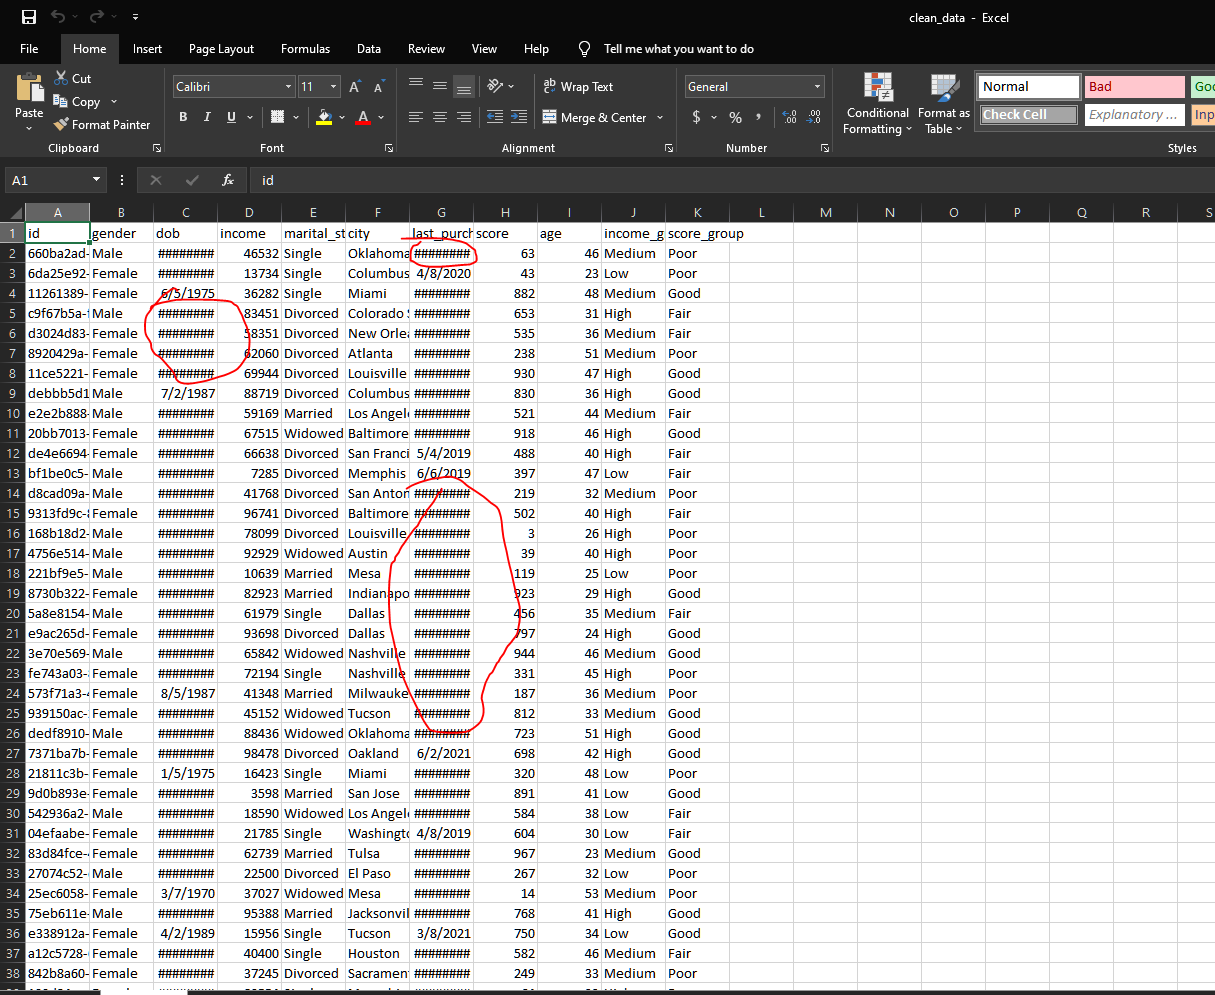

To fix this issue or to see them properly, simply just increase the column size.

![image.png](|)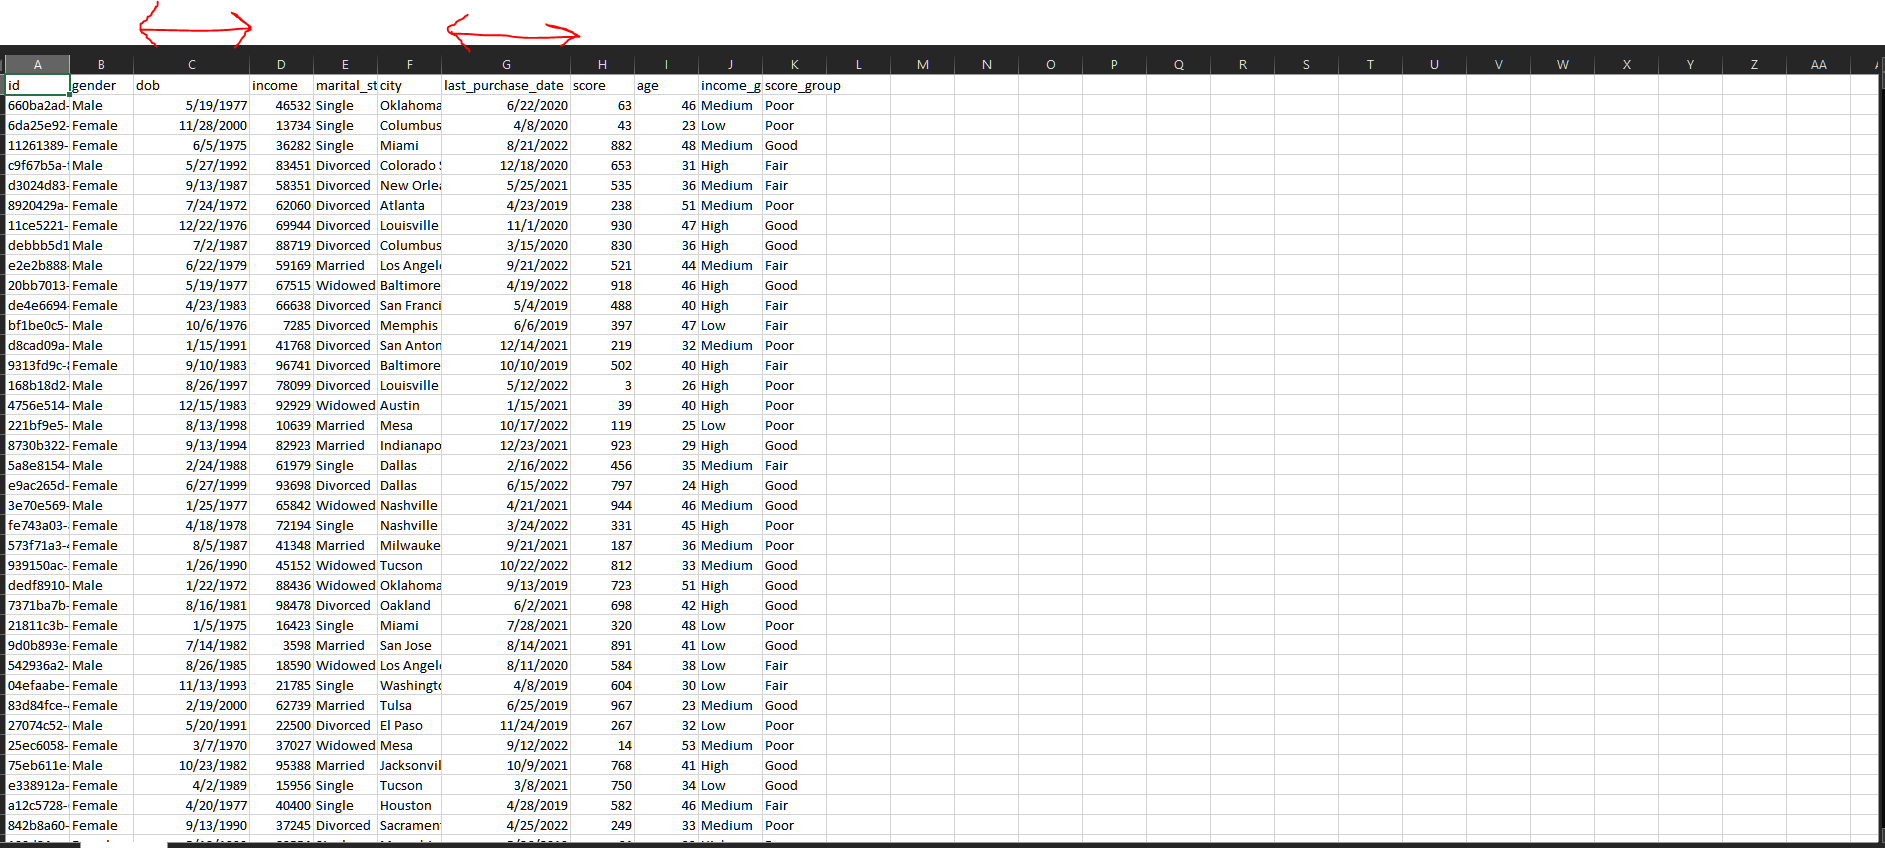

# Submitted by: 

**Name:** Md. Rezuwan Hassan

**Mail:** rezwanhasan262@gmail.com | md.rezuwan.hasan@g.bracu.ac.bd

**Phone:** +8801735066946

**LinkedIn:** https://www.linkedin.com/in/md-rezuwan-hasan-04246416b/